In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [150]:
from sklearn.datasets import (load_iris, load_digits, load_wine,
                             load_breast_cancer, load_diabetes)
from ucimlrepo import fetch_ucirepo

std_datasets = {
        "iris": load_iris(),
        "diabetes": load_diabetes(),
        "digits": load_digits(),
        "wine": load_wine(),
        "cancer": load_breast_cancer(),
    }

uci_datasets = {
        "breast_cancer": fetch_ucirepo(id=17),
        "glass": fetch_ucirepo(id=42),
    }


def load_dataset(source):
    if source in std_datasets:
        dataset = std_datasets[source]
        return dataset.data, dataset.feature_names, dataset.target
    elif source in uci_datasets:
        dataset = uci_datasets[source]
        return dataset.data.features.values, dataset.data.features.columns.tolist(), dataset.data.targets.iloc[:, 0].tolist()
        # return dataset.data.iloc[:, :-1].values, dataset.data.columns[:-1].tolist(), dataset.data.iloc[:, -1].values


In [119]:
# spa = pd.read_csv('C:\\Users\\leonardo.arrighi\\Documents\\FHG\\DPG_official\\DPG\\datasets\\test\\SPA.csv', sep=',')
# spa['GradeClass'].unique()
# # spa

Random Forest Accuracy: 0.7538461538461538
              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.77      0.77      0.77        22
           3       1.00      0.20      0.33         5
           5       0.60      1.00      0.75         3
           6       1.00      0.80      0.89         5
           7       0.89      0.73      0.80        11

    accuracy                           0.75        65
   macro avg       0.82      0.72      0.71        65
weighted avg       0.79      0.75      0.74        65



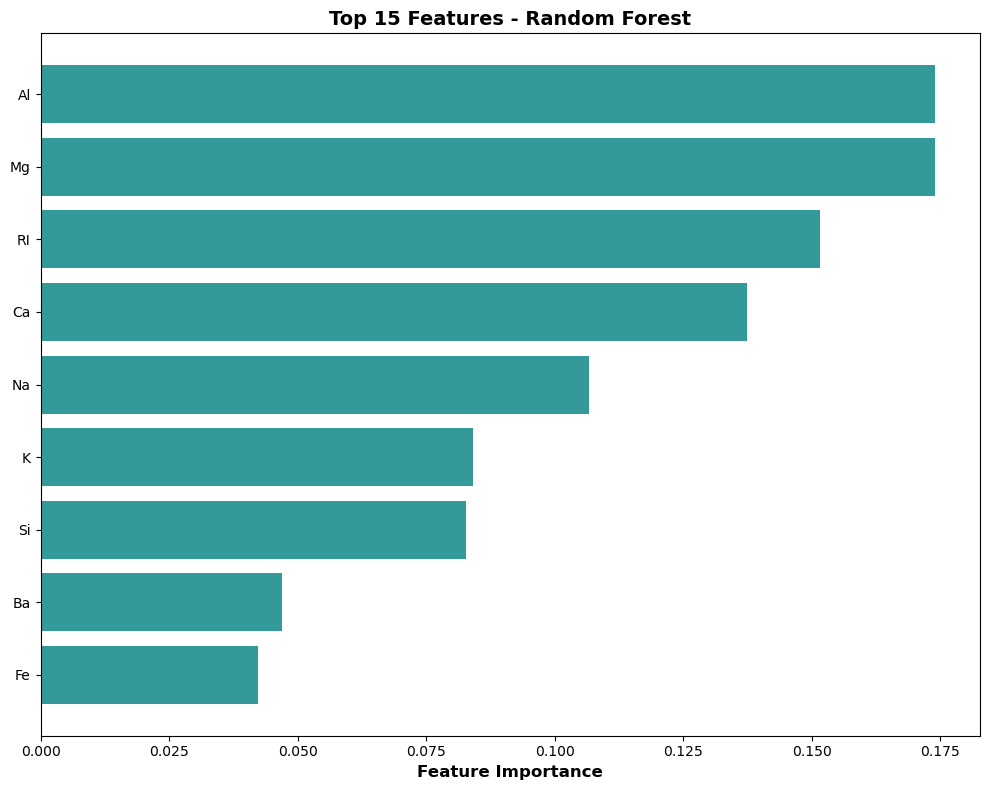

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder


data, features, target = load_dataset("glass")

X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.3, random_state=130196
    )

rf = RandomForestClassifier(n_estimators=200, random_state=130196)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



def plot_feature_importance(model, feature_names, model_name, top_n=15):
    """Plot feature importance for tree-based models"""
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]
    
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importances[indices], color='teal', alpha=0.8)
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
    plt.title(f'Top {top_n} Features - {model_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf, features, 'Random Forest')

In [195]:
data, features, target = load_dataset("glass")

dataset = fetch_ucirepo(id=42)
glass_data = dataset.data.features.copy()

glass_data['diagnosis'] = dataset.data.targets.iloc[:, 0].tolist()

glass_data['RI']

0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: RI, Length: 214, dtype: float64

In [152]:
plt.figure(figsize=(10, 10))

sns.pairplot(glass_data, hue='diagnosis', diag_kind='kde', palette='tab10')
plt.savefig('C:\\Users\\leonardo.arrighi\\Documents\\FHG\\DPG_official\\DPG\\examples\\test\\glass_data_pairplot.png')
plt.close()

<Figure size 1000x1000 with 0 Axes>

In [208]:
path = 'C:\\Users\\leonardo.arrighi\\Documents\\FHG\\DPG_official\\DPG\\examples\\tpot'
path_test = 'C:\\Users\\leonardo.arrighi\\Documents\\FHG\\DPG_official\\DPG\\examples\\test'
dpg_clusters_02 = pd.read_csv(os.path.join(path, 'thy_l100_seed160898_t0.2_dpg_clusters_count.csv')).set_index('Unnamed: 0')
dpg_clusters_02.index.name = None
dpg_clusters_02['Sum_features'] = dpg_clusters_02.sum(axis=1)
dpg_clusters_02.loc['Total'] = dpg_clusters_02.sum(numeric_only=True, axis=0)
dpg_clusters_04 = pd.read_csv(os.path.join(path, 'thy_l100_seed160898_t0.4_dpg_clusters_count.csv')).set_index('Unnamed: 0')
dpg_clusters_04.index.name = None
dpg_clusters_04['Sum_features'] = dpg_clusters_04.sum(axis=1)
dpg_clusters_04.loc['Total'] = dpg_clusters_04.sum(numeric_only=True, axis=0)
dpg_clusters_05 = pd.read_csv(os.path.join(path, 'thy_l100_seed160898_t0.5_dpg_clusters_count.csv')).set_index('Unnamed: 0')
dpg_clusters_05.index.name = None
dpg_clusters_05['Sum_features'] = dpg_clusters_05.sum(axis=1)
dpg_clusters_05.loc['Total'] = dpg_clusters_05.sum(numeric_only=True, axis=0)
spa_clusters = pd.read_csv(os.path.join(path, 'stud_l100_seed160898_t0.2_dpg_clusters_count.csv')).set_index('Unnamed: 0')
spa_clusters.index.name = None
spa_clusters['Sum_features'] = spa_clusters.sum(axis=1)
spa_clusters.loc['Total'] = spa_clusters.sum(numeric_only=True, axis=0)
bca_clusters = pd.read_csv(os.path.join(path_test, 'bca_l100_seed160898_t0.2_dpg_clusters_count.csv')).set_index('Unnamed: 0')
bca_clusters.index.name = None
bca_clusters['Sum_features'] = bca_clusters.sum(axis=1)
bca_clusters.loc['Total'] = bca_clusters.sum(numeric_only=True, axis=0)
bca_clusters = pd.read_csv(os.path.join(path_test, 'bca_l100_seed160898_t0.5_dpg_clusters_count.csv')).set_index('Unnamed: 0')
bca_clusters.index.name = None
bca_clusters['Sum_features'] = bca_clusters.sum(axis=1)
bca_clusters.loc['Total'] = bca_clusters.sum(numeric_only=True, axis=0)
glass_clusters = pd.read_csv(os.path.join(path_test, 'glass_l200_seed130196_t0.4_dpg_clusters_count.csv')).set_index('Unnamed: 0')
glass_clusters.index.name = None
glass_clusters['Sum_features'] = glass_clusters.sum(axis=1)
glass_clusters.loc['Total'] = glass_clusters.sum(numeric_only=True, axis=0)
# dpg_clusters_intervals = pd.read_csv(os.path.join(path, 'thy_l100_seed160898_t0.2_dpg_clusters_intervals.csv'))
dpg_nodes = pd.read_csv(os.path.join(path, 'thy_l100_seed160898_node_metrics.csv'))
spa_nodes = pd.read_csv(os.path.join(path, 'stud_l100_seed160898_node_metrics.csv'))
bca_nodes = pd.read_csv(os.path.join(path_test, 'bca_l100_seed160898_node_metrics.csv'))
glass_nodes = pd.read_csv(os.path.join(path_test, 'glass_l200_seed130196_node_metrics.csv'))

In [209]:
glass_nodes_ = glass_nodes.drop(columns=['Unnamed: 0', 'Node', 'Degree', 'In degree nodes', 'Out degree nodes'])
glass_nodes_ = glass_nodes_.sort_values('Local reaching centrality', ascending=False, inplace=False)
glass_nodes_.head(20)

,Betweenness centrality,Local reaching centrality,Label
845,1.606558e-03,6.550063,Al <= 1.815
3698,0.000000e+00,6.405097,RI <= 1.523285
2942,0.000000e+00,6.196119,Al <= 1.865
3676,0.000000e+00,6.138566,Na <= 14.37
760,2.017346e-03,6.009655,Mg > 2.7
3392,0.000000e+00,5.992396,Al <= 1.92
2119,8.614199e-04,5.859269,Mg <= 3.735
3383,6.649751e-06,5.858802,K > 0.05
3715,0.000000e+00,5.674984,Ba <= 0.27
273,7.041239e-03,5.639985,Al > 1.39


In [210]:
glass_nodes_ = glass_nodes_.sort_values('Betweenness centrality', ascending=False, inplace=False)
glass_nodes_.head(20)

,Betweenness centrality,Local reaching centrality,Label
1768,0.036243,3.567748,Ca > 9.61
346,0.035393,2.422441,K <= 0.54
411,0.031032,3.895445,Al > 1.38
589,0.028789,3.442684,Si > 72.719997
481,0.027338,2.394514,Na > 13.77
326,0.025740,3.258677,Fe > 0.185
1304,0.025320,3.361316,Al > 1.235
439,0.024292,3.274640,Si <= 71.465
618,0.022745,2.678619,Fe <= 0.07
1221,0.022567,4.510344,Na > 14.01


In [205]:
dataset.data.targets['Type_of_glass'].value_counts()

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [246]:
dpg_clusters_02

,Class 0,Class 1,Class 2,Class 3,Class 4,Ambiguous,Sum_features
a1,20,32,57,14,17,0,140
a2,52,67,135,27,23,0,304
a3,14,25,62,8,21,0,130
a4,14,28,61,36,5,0,144
a5,17,50,105,20,10,0,202
Total,117,202,420,105,76,0,920


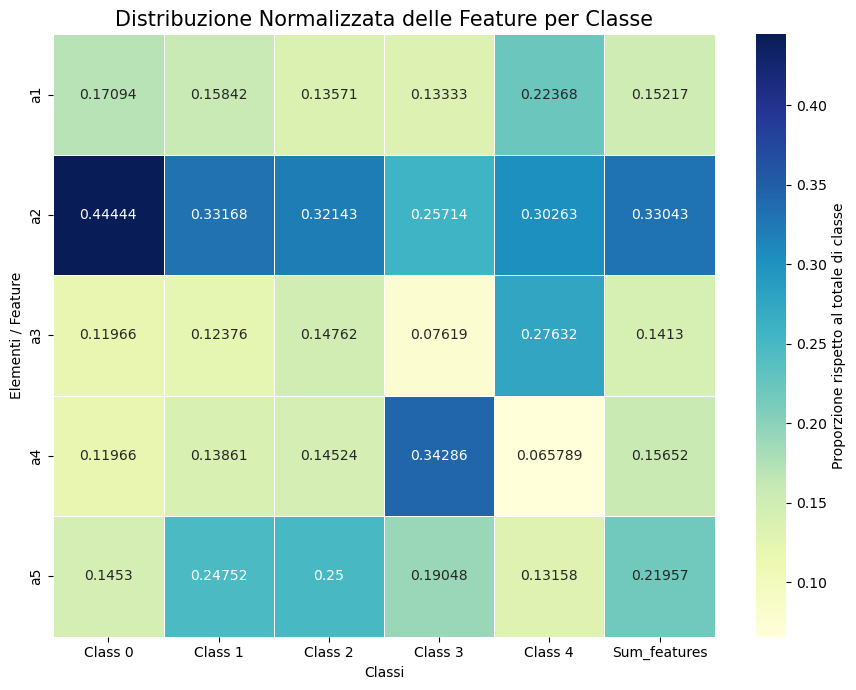

     Class 0   Class 1   Class 2   Class 3   Class 4  Sum_features
a1  0.170940  0.158416  0.135714  0.133333  0.223684      0.152174
a2  0.444444  0.331683  0.321429  0.257143  0.302632      0.330435
a3  0.119658  0.123762  0.147619  0.076190  0.276316      0.141304
a4  0.119658  0.138614  0.145238  0.342857  0.065789      0.156522
a5  0.145299  0.247525  0.250000  0.190476  0.131579      0.219565


In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

df = dpg_clusters_02

# if 'Sum_features' in df.columns:
#     df = df.drop(columns=['Sum_features'])
if 'Ambiguous' in df.columns:
    df = df.drop(columns=['Ambiguous'])

totals = df.loc['Total']

df_norm = df.drop('Total') / totals

plt.figure(figsize=(9, 7))
sns.heatmap(
    df_norm, 
    annot=True,          # Mostra i valori numerici nelle celle
    cmap='YlGnBu',       # Scala cromatica dal giallo al blu
    fmt='.5',           # Formatta i numeri come percentuali con 2 decimali
    linewidths=.5,       # Aggiunge una griglia sottile tra le celle
    cbar_kws={'label': 'Proporzione rispetto al totale di classe'}
)

plt.title('Distribuzione Normalizzata delle Feature per Classe', fontsize=15)
plt.ylabel('Elementi / Feature')
plt.xlabel('Classi')
plt.tight_layout()

plt.show()

print(df_norm)


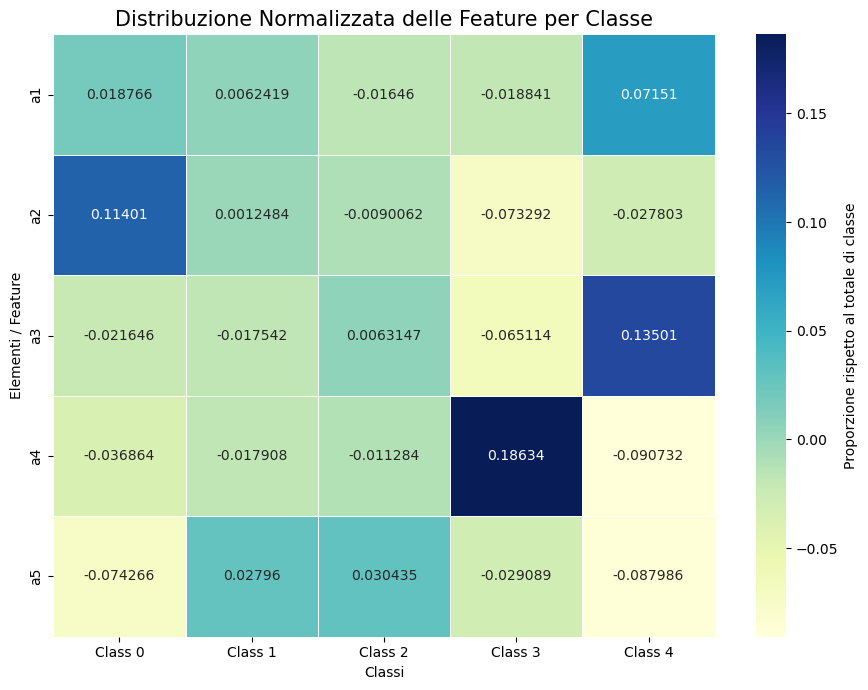

     Class 0   Class 1   Class 2   Class 3   Class 4
a1  0.018766  0.006242 -0.016460 -0.018841  0.071510
a2  0.114010  0.001248 -0.009006 -0.073292 -0.027803
a3 -0.021646 -0.017542  0.006315 -0.065114  0.135011
a4 -0.036864 -0.017908 -0.011284  0.186335 -0.090732
a5 -0.074266  0.027960  0.030435 -0.029089 -0.087986


In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

df = dpg_clusters_02


if 'Ambiguous' in df.columns:
    df = df.drop(columns=['Ambiguous'])

totals = df.loc['Total']

df_norm = df.drop('Total') / totals

sum_features = df_norm['Sum_features']
if 'Sum_features' in df_norm.columns:
    df_norm = df_norm.drop(columns=['Sum_features'])

df_norm = df_norm.sub(sum_features, axis=0)

plt.figure(figsize=(9, 7))
sns.heatmap(
    df_norm, 
    annot=True,          # Mostra i valori numerici nelle celle
    cmap='YlGnBu',       # Scala cromatica dal giallo al blu
    fmt='.5',           # Formatta i numeri come percentuali con 2 decimali
    linewidths=.5,       # Aggiunge una griglia sottile tra le celle
    cbar_kws={'label': 'Proporzione rispetto al totale di classe'}
)

plt.title('Distribuzione Normalizzata delle Feature per Classe', fontsize=15)
plt.ylabel('Elementi / Feature')
plt.xlabel('Classi')
plt.tight_layout()

plt.show()

print(df_norm)


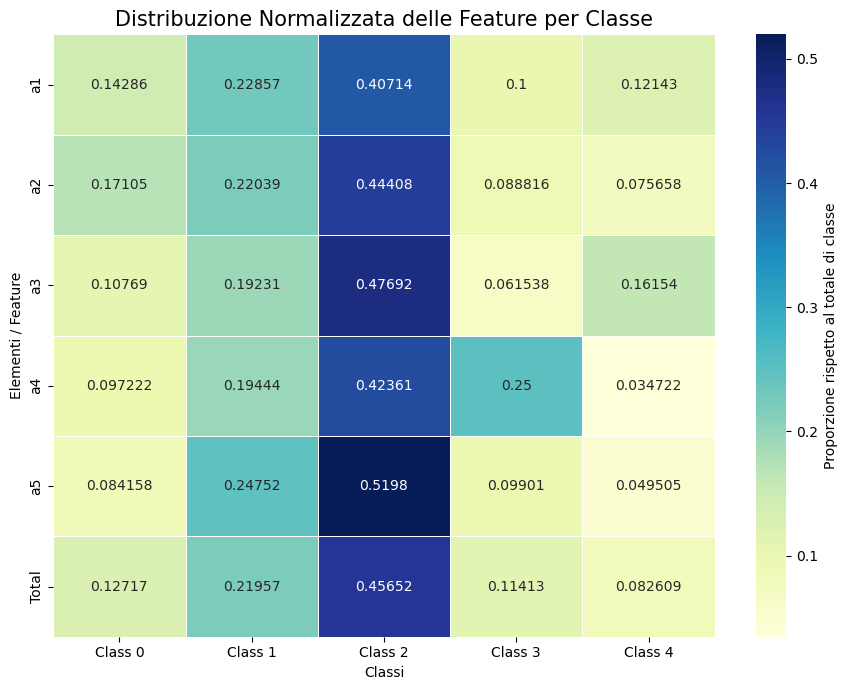

        Class 0   Class 1   Class 2   Class 3   Class 4
a1     0.142857  0.228571  0.407143  0.100000  0.121429
a2     0.171053  0.220395  0.444079  0.088816  0.075658
a3     0.107692  0.192308  0.476923  0.061538  0.161538
a4     0.097222  0.194444  0.423611  0.250000  0.034722
a5     0.084158  0.247525  0.519802  0.099010  0.049505
Total  0.127174  0.219565  0.456522  0.114130  0.082609


In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

df = dpg_clusters_02

# if 'Sum_features' in df.columns:
#     df = df.drop(columns=['Sum_features'])
if 'Ambiguous' in df.columns:
    df = df.drop(columns=['Ambiguous'])

totals = df['Sum_features']

df_norm = df.drop(columns=['Sum_features']).div(totals, axis=0)

plt.figure(figsize=(9, 7))
sns.heatmap(
    df_norm, 
    annot=True,          # Mostra i valori numerici nelle celle
    cmap='YlGnBu',       # Scala cromatica dal giallo al blu
    fmt='.5',           # Formatta i numeri come percentuali con 2 decimali
    linewidths=.5,       # Aggiunge una griglia sottile tra le celle
    cbar_kws={'label': 'Proporzione rispetto al totale di classe'}
)

plt.title('Distribuzione Normalizzata delle Feature per Classe', fontsize=15)
plt.ylabel('Elementi / Feature')
plt.xlabel('Classi')
plt.tight_layout()

plt.show()

print(df_norm)


### lrc by community

In [227]:
import ast

def extract_clusters_safe(file_path):
    clusters = {}
    is_cluster_section = False
    
    other_sections = ["Probability:", "Confidence Interval:"] 

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line: continue
            
            if line.startswith("Clusters:"):
                is_cluster_section = True
                continue
            
            if is_cluster_section:
    
                if any(line.startswith(section) for section in other_sections):
                    break
                
                if ":" in line and "[" in line:
                    parts = line.split(":", 1)
                    key = parts[0].strip()
                    value_str = parts[1].strip()
                    
                    try:
                        clusters[key] = ast.literal_eval(value_str)
                    except Exception as e:
                        print(f"Errore nel parsing della riga {key}: {e}")
    
    return clusters

clusters_dict = extract_clusters_safe('C:\\Users\\leonardo.arrighi\\Documents\\FHG\\DPG_official\\DPG\\examples\\test\\glass_l200_seed130196_t0.4_dpg_clusters.txt')

In [231]:
mapping = {}
for cluster_name, conditions in clusters_dict.items():
    for cond in conditions:
        mapping[cond] = cluster_name

glass_nodes['Cluster'] = glass_nodes['Label'].map(mapping)

In [245]:
glass_nodes_ = glass_nodes.drop(columns=['Unnamed: 0', 'Node', 'Degree', 'In degree nodes', 'Out degree nodes'])
glass_nodes_ = glass_nodes_[glass_nodes_['Cluster'] == 'Class 6'].sort_values('Local reaching centrality', ascending=False, inplace=False)
glass_nodes_.head(20)

,Betweenness centrality,Local reaching centrality,Label,Cluster
551,0.000676,3.751272,Mg <= 2.955,Class 6
1242,0.013791,3.487775,Mg > 2.22,Class 6
519,0.003153,3.409968,Mg > 2.14,Class 6
308,0.014149,3.355741,Mg > 1.12,Class 6
324,0.004422,3.317209,Ca <= 10.455,Class 6
1966,0.001508,3.196490,Al <= 1.73,Class 6
533,0.002944,3.083967,Si <= 72.684998,Class 6
2198,0.000180,2.993293,Si > 72.259998,Class 6
362,0.003601,2.950697,RI <= 1.5199,Class 6
1043,0.005816,2.941484,K <= 0.03,Class 6


In [234]:
glass_nodes_ = glass_nodes.drop(columns=['Unnamed: 0', 'Node', 'Degree', 'In degree nodes', 'Out degree nodes'])
glass_nodes_ = glass_nodes_[glass_nodes_['Cluster'] == 'Class 7'].sort_values('Betweenness centrality', ascending=False, inplace=False)
glass_nodes_.head(20)

,Betweenness centrality,Local reaching centrality,Label,Cluster
594,0.012002,3.582624,K <= 0.33,Class 7
620,0.010148,2.902662,Si > 71.779999,Class 7
1033,0.009756,2.616373,K <= 0.01,Class 7
543,0.008476,2.937319,Na > 14.195,Class 7
402,0.006966,3.138812,K <= 0.42,Class 7
2360,0.006587,3.223677,Ca <= 9.49,Class 7
527,0.004719,3.185405,Mg <= 2.995,Class 7
1108,0.004182,3.110343,Al > 0.765,Class 7
925,0.003214,4.341138,Ba > 0.415,Class 7
824,0.003012,3.322184,Na > 13.785,Class 7
